<a href="https://colab.research.google.com/github/VictorDreke/Data-Science-for-Finance/blob/master/AppleStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Description: This program uses an artificial neural network called Long Short Term Memory (LSTM) 
#               to predict the closing stock price of a corporation (Apple Inc) using the past 60 day stock price.


In [56]:
# Import the libraries
import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn. preprocessing import MinMaxScaler
from keras. models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [57]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.757477


In [58]:
# Get the number of row and column of the dataset
df.shape

(2003, 6)

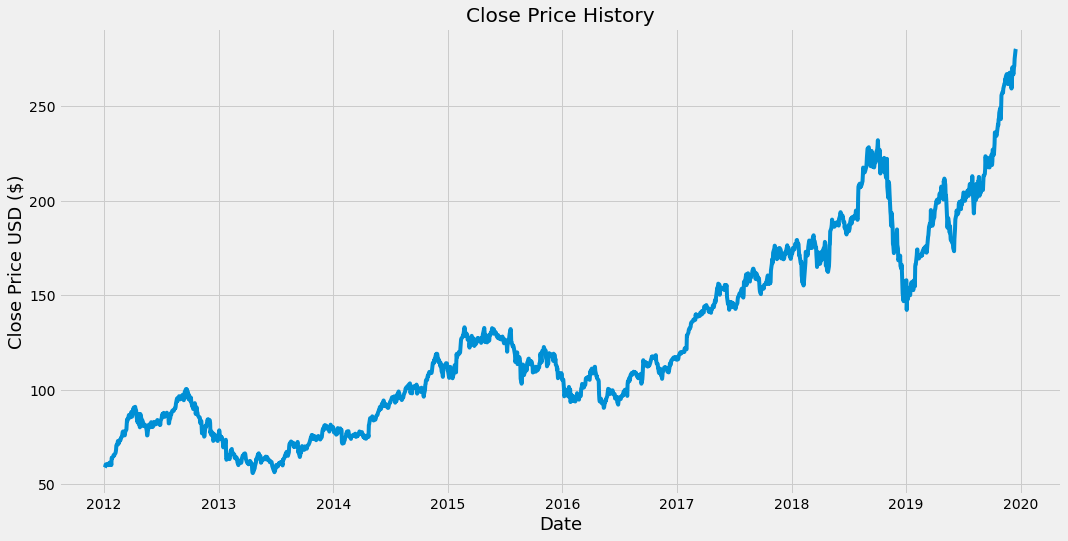

In [59]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [60]:
# Create a new dataframe with only the Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array 
dataset = data.values
# Get the number of rows to train the model on
training_score_len = math.ceil(len(dataset) * .8)
training_score_len

1603

In [61]:
# Scale the data
# In practice is almost alway an advantage preprocessing the data before to
# presented to the ANN
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [62]:
# Create the training dataset 
#Create the scaled training data set
train_data =scaled_data[0:training_score_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
# With this code the LSTM predicts using the last 60 values (also call time step)
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  

In [63]:
# Convert the x_train and y_train to numpy arrays so it is possible used them the LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
# LSTM expect the input be 3D in the form of the number of examples, number time step and number of feature
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [64]:
# Build the LSTM model
model = Sequential()
number_neuron = 50
number_time_step = x_train.shape[1]
number_of_feature = 1
# return_sequences is True because  we gone to use another LSTM layer 
# input_shpae is set because is the first layer 
model.add(LSTM(number_neuron, return_sequences=True, input_shape=(number_time_step, number_of_feature)))
# return_sequences is False because  we dont gone to use another LSTM layer 
model.add(LSTM(number_neuron, return_sequences=False))
# This is a classical neural network layer
number_neuron = 25
model.add(Dense(number_neuron))
number_neuron = 1
model.add(Dense(number_neuron))

In [65]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [66]:
# Train the model 
# batch_size total of example used in a simple batch
# epochs  is the number of iteration when an entired dataset is passed forward 
# and backward
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1543/1543 [==============================] - 60s 39ms/step - loss: 8.8969e-04
Epoch 2/2
1543/1543 [==============================] - 59s 38ms/step - loss: 3.6796e-04


In [67]:
# Create the testing data set
# Create anew array containing scaled values from index 1543 to 2003
test_data = scaled_data[len(train_data) - 60:, :]
#Create the data set x_test
x_test = []
train_data_len = len(train_data)
y_test = dataset[train_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [68]:
# Convert the data to numpy array
x_test = np.array(x_test)
x_test

array([[0.51322235, 0.51958863, 0.53294452, ..., 0.58926183, 0.58164901,
        0.58939538],
       [0.51958863, 0.53294452, 0.54839284, ..., 0.58164901, 0.58939538,
        0.5840976 ],
       [0.53294452, 0.54839284, 0.54581069, ..., 0.58939538, 0.5840976 ,
        0.58107023],
       ...,
       [0.7353308 , 0.72095091, 0.72535838, ..., 0.94688811, 0.95708301,
        0.96015487],
       [0.72095091, 0.72535838, 0.7207283 , ..., 0.95708301, 0.96015487,
        0.97658263],
       [0.72535838, 0.7207283 , 0.7356424 , ..., 0.96015487, 0.97658263,
        0.99755134]])

In [69]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [70]:
# Get the models predicted price values 
predictions =  model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [71]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.5578306198120118

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'lower rigth'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


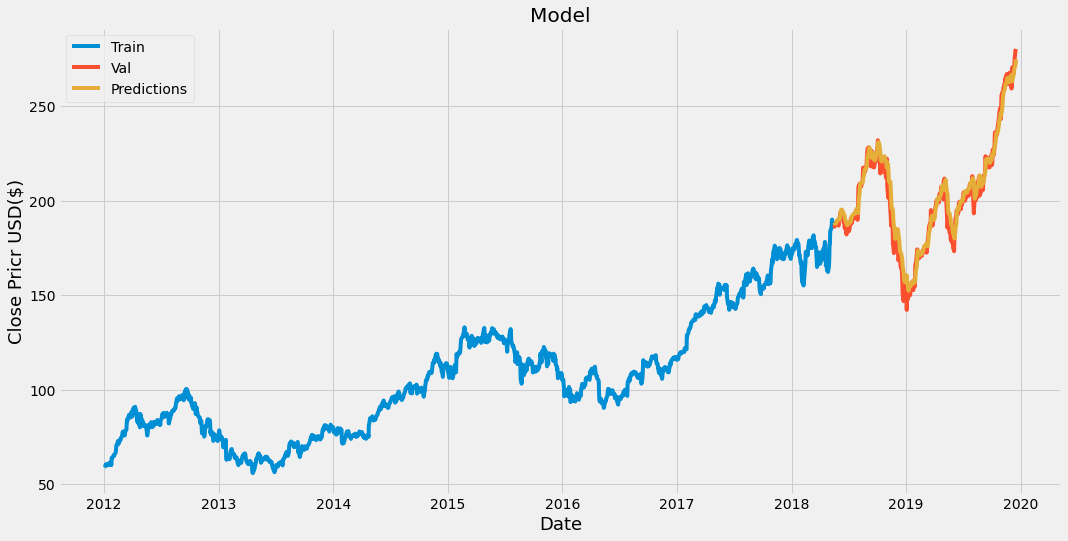

In [72]:
# Plot the data 
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Pricr USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower rigth')
plt.show()

In [73]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,188.422806
2018-05-18,186.309998,188.093323
2018-05-21,187.630005,187.750046
2018-05-22,187.160004,187.930313
2018-05-23,188.360001,188.197662
...,...,...
2019-12-11,270.769989,268.284058
2019-12-12,271.459991,269.461395
2019-12-13,275.149994,270.482513


In [74]:
# Get the quote 
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing values and convert the dataframe to an array 
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty lis
x_test = []
#Append the past 60 days
x_test.append(last_60_days_scaled)
# Convert the x_test data set to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(x_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[277.13608]]


In [75]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
apple_quote

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-18,281.899994,279.119995,279.799988,279.73999,29007100,278.324249
